In [557]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

eca = pd.read_csv('eca.csv')

eca.head()


,MATRICULA,SIT_MATRICULA,PAI_FALECIDO,MAE_FALECIDO,RENDA_FAMILIAR,TIPO_ESCOLA_ORIGEM,ANO_CONCLUSAO_2_GRAU,RENDA_PER_CAPITA,COD_ESTADO_CIVIL,N_FILHOS,...,DESC_IDIOMA,NIVEL_FALA,NIVEL_COMPREENSAO,NIVEL_ESCRITA,NIVEL_LEITURA,ANO LETIVO IC,ANO LETIVO BOLSA,NOTA,N_FALTAS,COD_DISICIPLINA
0,20112010700223,9,0.0,0.0,NaN,O,2007.0,NaN,NaN,NaN,...,Inglês,3.0,3.0,3.0,3.0,NaN,NaN,7.30,NaN,8555.0
1,20112010700223,9,0.0,0.0,NaN,O,2007.0,NaN,NaN,NaN,...,Espanhol,2.0,2.0,2.0,2.0,NaN,NaN,7.30,NaN,8555.0
2,20112010700223,9,0.0,0.0,NaN,O,2007.0,NaN,NaN,NaN,...,Inglês,3.0,3.0,3.0,3.0,NaN,NaN,6.30,NaN,648.0
3,20112010700223,9,0.0,0.0,NaN,O,2007.0,NaN,NaN,NaN,...,Espanhol,2.0,2.0,2.0,2.0,NaN,NaN,6.30,NaN,648.0
4,20112010700223,9,0.0,0.0,NaN,O,2007.0,NaN,NaN,NaN,...,Inglês,3.0,3.0,3.0,3.0,NaN,NaN,9.30,NaN,9108.0


In [558]:
#CARREGANDO DATASET INFORMANDO FORMATO DOS 'MISSING VALUES'
eca = pd.read_csv('eca.csv', na_values=['NULL'], dtype={"MATRICULA" : "object"})

#CRIANDO CAMPO DE ANO DE INGRASSO PARA CÁLCULO DA IDADE DE INGRESSO
eca['ANO_INGRESSSO'] = eca['MATRICULA'].str[:4]

#ano = eca['MATRICULA'].str.extract('[ab](\d)')

eca.dtypes


MATRICULA                object
SIT_MATRICULA             int64
PAI_FALECIDO            float64
MAE_FALECIDO            float64
RENDA_FAMILIAR          float64
TIPO_ESCOLA_ORIGEM       object
ANO_CONCLUSAO_2_GRAU    float64
RENDA_PER_CAPITA        float64
COD_ESTADO_CIVIL         object
N_FILHOS                float64
SEXO                     object
DT_NASCIMENTO            object
PROFISSAO                object
DESC_CIDADE              object
DESC_IDIOMA              object
NIVEL_FALA              float64
NIVEL_COMPREENSAO       float64
NIVEL_ESCRITA           float64
NIVEL_LEITURA           float64
ANO LETIVO IC           float64
ANO LETIVO BOLSA        float64
NOTA                     object
N_FALTAS                float64
COD_DISICIPLINA         float64
ANO_INGRESSSO            object
dtype: object

In [559]:
#VISUALIZANDO OS DESCRITORES DO DATASET

eca.describe()

/home/sandeco/anaconda3/lib/python3.5/site-packages/numpy/lib/function_base.py:3823: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,SIT_MATRICULA,PAI_FALECIDO,MAE_FALECIDO,RENDA_FAMILIAR,ANO_CONCLUSAO_2_GRAU,RENDA_PER_CAPITA,N_FILHOS,NIVEL_FALA,NIVEL_COMPREENSAO,NIVEL_ESCRITA,NIVEL_LEITURA,ANO LETIVO IC,ANO LETIVO BOLSA,N_FALTAS,COD_DISICIPLINA
count,25123.000000,18923.000000,19036.0,14042.000000,23041.000000,14415.000000,12365.000000,14173.000000,14173.000000,14173.000000,14173.000000,0.0,0.0,19810.000000,20770.000000
mean,6.107232,0.018390,0.0,1.111238,2007.717677,6.803052,0.093894,1.749030,1.985677,1.809074,2.156989,NaN,NaN,10.560626,10249.072123
std,6.988199,0.134362,0.0,1.832612,4.323127,4.262282,0.459452,0.749367,0.747188,0.735254,0.741196,NaN,NaN,18.219861,4530.071757
min,0.000000,0.000000,0.0,0.000000,1973.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,NaN,NaN,0.000000,648.000000
25%,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,10.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,20.000000,1.000000,0.0,6.000000,2015.000000,10.000000,4.000000,3.000000,3.000000,3.000000,3.000000,NaN,NaN,128.000000,24371.000000


In [560]:
#EXCLUINDO AS COLUNAS [MATRICULA, PAI_FALECIDO, MAE_FALECIDO, ANO LETIVO IC, ANO LETIVO BOLSA]
eca.drop(eca.columns[[0, 2, 3, 12, 13]],axis=1, inplace=True)

eca.head()




,SIT_MATRICULA,RENDA_FAMILIAR,TIPO_ESCOLA_ORIGEM,ANO_CONCLUSAO_2_GRAU,RENDA_PER_CAPITA,COD_ESTADO_CIVIL,N_FILHOS,SEXO,DT_NASCIMENTO,DESC_IDIOMA,NIVEL_FALA,NIVEL_COMPREENSAO,NIVEL_ESCRITA,NIVEL_LEITURA,ANO LETIVO IC,ANO LETIVO BOLSA,NOTA,N_FALTAS,COD_DISICIPLINA,ANO_INGRESSSO
0,9,NaN,O,2007.0,NaN,NaN,NaN,M,1988-11-26 00:00:00.000,Inglês,3.0,3.0,3.0,3.0,NaN,NaN,7.30,NaN,8555.0,2011
1,9,NaN,O,2007.0,NaN,NaN,NaN,M,1988-11-26 00:00:00.000,Espanhol,2.0,2.0,2.0,2.0,NaN,NaN,7.30,NaN,8555.0,2011
2,9,NaN,O,2007.0,NaN,NaN,NaN,M,1988-11-26 00:00:00.000,Inglês,3.0,3.0,3.0,3.0,NaN,NaN,6.30,NaN,648.0,2011
3,9,NaN,O,2007.0,NaN,NaN,NaN,M,1988-11-26 00:00:00.000,Espanhol,2.0,2.0,2.0,2.0,NaN,NaN,6.30,NaN,648.0,2011
4,9,NaN,O,2007.0,NaN,NaN,NaN,M,1988-11-26 00:00:00.000,Inglês,3.0,3.0,3.0,3.0,NaN,NaN,9.30,NaN,9108.0,2011


In [561]:
#USANDO SOMENTE O INGLÊS COMO IDIOMA DE REFERÊNCIA
#EXCLUINDO DADOS DUPLICADOS
eca = eca.loc[eca['DESC_IDIOMA']=='Inglês']
eca

,SIT_MATRICULA,RENDA_FAMILIAR,TIPO_ESCOLA_ORIGEM,ANO_CONCLUSAO_2_GRAU,RENDA_PER_CAPITA,COD_ESTADO_CIVIL,N_FILHOS,SEXO,DT_NASCIMENTO,DESC_IDIOMA,NIVEL_FALA,NIVEL_COMPREENSAO,NIVEL_ESCRITA,NIVEL_LEITURA,ANO LETIVO IC,ANO LETIVO BOLSA,NOTA,N_FALTAS,COD_DISICIPLINA,ANO_INGRESSSO
0,9,NaN,O,2007.0,NaN,NaN,NaN,M,1988-11-26 00:00:00.000,Inglês,3.0,3.0,3.0,3.0,NaN,NaN,7.30,NaN,8555.0,2011
2,9,NaN,O,2007.0,NaN,NaN,NaN,M,1988-11-26 00:00:00.000,Inglês,3.0,3.0,3.0,3.0,NaN,NaN,6.30,NaN,648.0,2011
4,9,NaN,O,2007.0,NaN,NaN,NaN,M,1988-11-26 00:00:00.000,Inglês,3.0,3.0,3.0,3.0,NaN,NaN,9.30,NaN,9108.0,2011
6,9,NaN,O,2007.0,NaN,NaN,NaN,M,1988-11-26 00:00:00.000,Inglês,3.0,3.0,3.0,3.0,NaN,NaN,8.30,NaN,9109.0,2011
8,9,NaN,O,2007.0,NaN,NaN,NaN,M,1988-11-26 00:00:00.000,Inglês,3.0,3.0,3.0,3.0,NaN,NaN,7.00,NaN,7588.0,2011
10,9,NaN,O,2007.0,NaN,NaN,NaN,M,1988-11-26 00:00:00.000,Inglês,3.0,3.0,3.0,3.0,NaN,NaN,6.50,NaN,8595.0,2011
12,9,NaN,O,2007.0,NaN,NaN,NaN,M,1988-11-26 00:00:00.000,Inglês,3.0,3.0,3.0,3.0,NaN,NaN,8.80,NaN,8562.0,2011
14,9,NaN,O,2007.0,NaN,NaN,NaN,M,1988-11-26 00:00:00.000,Inglês,3.0,3.0,3.0,3.0,NaN,NaN,04/10/2016,4.0,9111.0,2011
16,9,NaN,O,2007.0,NaN,NaN,NaN,M,1988-11-26 00:00:00.000,Inglês,3.0,3.0,3.0,3.0,NaN,NaN,8.70,NaN,8028.0,2011
18,9,NaN,O,2007.0,NaN,NaN,NaN,M,1988-11-26 00:00:00.000,Inglês,3.0,3.0,3.0,3.0,NaN,NaN,8.20,0.0,9117.0,2011


In [562]:
#RENOMEANDO CAMPOS DAS 4 HABILIDADES EM INGLÊS
eca = eca.rename(columns = {'NIVEL_FALA':'INGLES_FALA'})
eca = eca.rename(columns = {'NIVEL_COMPREENSAO':'INGLES_COMPREENSAO'})
eca = eca.rename(columns = {'NIVEL_ESCRITA':'INGLES_ESCRITA'})
eca = eca.rename(columns = {'NIVEL_LEITURA':'INGLES_LEITURA'})

#EXCLUINDO O ATRIBUTO DESC_IDIOMA
eca.drop('DESC_IDIOMA',axis=1, inplace=True)


eca

,SIT_MATRICULA,RENDA_FAMILIAR,TIPO_ESCOLA_ORIGEM,ANO_CONCLUSAO_2_GRAU,RENDA_PER_CAPITA,COD_ESTADO_CIVIL,N_FILHOS,SEXO,DT_NASCIMENTO,INGLES_FALA,INGLES_COMPREENSAO,INGLES_ESCRITA,INGLES_LEITURA,ANO LETIVO IC,ANO LETIVO BOLSA,NOTA,N_FALTAS,COD_DISICIPLINA,ANO_INGRESSSO
0,9,NaN,O,2007.0,NaN,NaN,NaN,M,1988-11-26 00:00:00.000,3.0,3.0,3.0,3.0,NaN,NaN,7.30,NaN,8555.0,2011
2,9,NaN,O,2007.0,NaN,NaN,NaN,M,1988-11-26 00:00:00.000,3.0,3.0,3.0,3.0,NaN,NaN,6.30,NaN,648.0,2011
4,9,NaN,O,2007.0,NaN,NaN,NaN,M,1988-11-26 00:00:00.000,3.0,3.0,3.0,3.0,NaN,NaN,9.30,NaN,9108.0,2011
6,9,NaN,O,2007.0,NaN,NaN,NaN,M,1988-11-26 00:00:00.000,3.0,3.0,3.0,3.0,NaN,NaN,8.30,NaN,9109.0,2011
8,9,NaN,O,2007.0,NaN,NaN,NaN,M,1988-11-26 00:00:00.000,3.0,3.0,3.0,3.0,NaN,NaN,7.00,NaN,7588.0,2011
10,9,NaN,O,2007.0,NaN,NaN,NaN,M,1988-11-26 00:00:00.000,3.0,3.0,3.0,3.0,NaN,NaN,6.50,NaN,8595.0,2011
12,9,NaN,O,2007.0,NaN,NaN,NaN,M,1988-11-26 00:00:00.000,3.0,3.0,3.0,3.0,NaN,NaN,8.80,NaN,8562.0,2011
14,9,NaN,O,2007.0,NaN,NaN,NaN,M,1988-11-26 00:00:00.000,3.0,3.0,3.0,3.0,NaN,NaN,04/10/2016,4.0,9111.0,2011
16,9,NaN,O,2007.0,NaN,NaN,NaN,M,1988-11-26 00:00:00.000,3.0,3.0,3.0,3.0,NaN,NaN,8.70,NaN,8028.0,2011
18,9,NaN,O,2007.0,NaN,NaN,NaN,M,1988-11-26 00:00:00.000,3.0,3.0,3.0,3.0,NaN,NaN,8.20,0.0,9117.0,2011


In [563]:
#IMPUTANDO ZERO OS MISSING VALUES EM N_FALTAS, NOTA E N_FILHOS.
eca.loc[eca['N_FALTAS'].isnull(),'N_FALTAS'] = 0.0
eca.loc[eca['NOTA'].isnull(),'NOTA'] = 0.0
eca.loc[eca['N_FILHOS'].isnull(),'N_FILHOS'] = 0.0

eca

,SIT_MATRICULA,RENDA_FAMILIAR,TIPO_ESCOLA_ORIGEM,ANO_CONCLUSAO_2_GRAU,RENDA_PER_CAPITA,COD_ESTADO_CIVIL,N_FILHOS,SEXO,DT_NASCIMENTO,INGLES_FALA,INGLES_COMPREENSAO,INGLES_ESCRITA,INGLES_LEITURA,ANO LETIVO IC,ANO LETIVO BOLSA,NOTA,N_FALTAS,COD_DISICIPLINA,ANO_INGRESSSO
0,9,NaN,O,2007.0,NaN,NaN,0.0,M,1988-11-26 00:00:00.000,3.0,3.0,3.0,3.0,NaN,NaN,7.30,0.0,8555.0,2011
2,9,NaN,O,2007.0,NaN,NaN,0.0,M,1988-11-26 00:00:00.000,3.0,3.0,3.0,3.0,NaN,NaN,6.30,0.0,648.0,2011
4,9,NaN,O,2007.0,NaN,NaN,0.0,M,1988-11-26 00:00:00.000,3.0,3.0,3.0,3.0,NaN,NaN,9.30,0.0,9108.0,2011
6,9,NaN,O,2007.0,NaN,NaN,0.0,M,1988-11-26 00:00:00.000,3.0,3.0,3.0,3.0,NaN,NaN,8.30,0.0,9109.0,2011
8,9,NaN,O,2007.0,NaN,NaN,0.0,M,1988-11-26 00:00:00.000,3.0,3.0,3.0,3.0,NaN,NaN,7.00,0.0,7588.0,2011
10,9,NaN,O,2007.0,NaN,NaN,0.0,M,1988-11-26 00:00:00.000,3.0,3.0,3.0,3.0,NaN,NaN,6.50,0.0,8595.0,2011
12,9,NaN,O,2007.0,NaN,NaN,0.0,M,1988-11-26 00:00:00.000,3.0,3.0,3.0,3.0,NaN,NaN,8.80,0.0,8562.0,2011
14,9,NaN,O,2007.0,NaN,NaN,0.0,M,1988-11-26 00:00:00.000,3.0,3.0,3.0,3.0,NaN,NaN,04/10/2016,4.0,9111.0,2011
16,9,NaN,O,2007.0,NaN,NaN,0.0,M,1988-11-26 00:00:00.000,3.0,3.0,3.0,3.0,NaN,NaN,8.70,0.0,8028.0,2011
18,9,NaN,O,2007.0,NaN,NaN,0.0,M,1988-11-26 00:00:00.000,3.0,3.0,3.0,3.0,NaN,NaN,8.20,0.0,9117.0,2011


In [564]:

#IMPUTANDO O VALOR DE 'S' (SOLTEIRO) AOS MISSING VALUES EM COD_ESTADO_CIVIL
eca.loc[eca['COD_ESTADO_CIVIL'].isnull(),'COD_ESTADO_CIVIL']='S'

In [565]:
#ATRIBUINDO A MÉDIA ARRENDONDADA AOS MISSING VALUES NA RENDA FAMILIAR
media_ajustada = round(eca['RENDA_FAMILIAR'].mean())
eca.loc[eca['RENDA_FAMILIAR'].isnull(),'RENDA_FAMILIAR']=media_ajustada

eca



,SIT_MATRICULA,RENDA_FAMILIAR,TIPO_ESCOLA_ORIGEM,ANO_CONCLUSAO_2_GRAU,RENDA_PER_CAPITA,COD_ESTADO_CIVIL,N_FILHOS,SEXO,DT_NASCIMENTO,INGLES_FALA,INGLES_COMPREENSAO,INGLES_ESCRITA,INGLES_LEITURA,ANO LETIVO IC,ANO LETIVO BOLSA,NOTA,N_FALTAS,COD_DISICIPLINA,ANO_INGRESSSO
0,9,1.0,O,2007.0,NaN,S,0.0,M,1988-11-26 00:00:00.000,3.0,3.0,3.0,3.0,NaN,NaN,7.30,0.0,8555.0,2011
2,9,1.0,O,2007.0,NaN,S,0.0,M,1988-11-26 00:00:00.000,3.0,3.0,3.0,3.0,NaN,NaN,6.30,0.0,648.0,2011
4,9,1.0,O,2007.0,NaN,S,0.0,M,1988-11-26 00:00:00.000,3.0,3.0,3.0,3.0,NaN,NaN,9.30,0.0,9108.0,2011
6,9,1.0,O,2007.0,NaN,S,0.0,M,1988-11-26 00:00:00.000,3.0,3.0,3.0,3.0,NaN,NaN,8.30,0.0,9109.0,2011
8,9,1.0,O,2007.0,NaN,S,0.0,M,1988-11-26 00:00:00.000,3.0,3.0,3.0,3.0,NaN,NaN,7.00,0.0,7588.0,2011
10,9,1.0,O,2007.0,NaN,S,0.0,M,1988-11-26 00:00:00.000,3.0,3.0,3.0,3.0,NaN,NaN,6.50,0.0,8595.0,2011
12,9,1.0,O,2007.0,NaN,S,0.0,M,1988-11-26 00:00:00.000,3.0,3.0,3.0,3.0,NaN,NaN,8.80,0.0,8562.0,2011
14,9,1.0,O,2007.0,NaN,S,0.0,M,1988-11-26 00:00:00.000,3.0,3.0,3.0,3.0,NaN,NaN,04/10/2016,4.0,9111.0,2011
16,9,1.0,O,2007.0,NaN,S,0.0,M,1988-11-26 00:00:00.000,3.0,3.0,3.0,3.0,NaN,NaN,8.70,0.0,8028.0,2011
18,9,1.0,O,2007.0,NaN,S,0.0,M,1988-11-26 00:00:00.000,3.0,3.0,3.0,3.0,NaN,NaN,8.20,0.0,9117.0,2011


In [566]:
#ATRIBUINDO A MÉDIA ARRENDONDADA AOS MISSING VALUES NA RENDA_PER_CAPITA
media_ajustada = round(eca['RENDA_PER_CAPITA'].mean())
eca.loc[eca['RENDA_PER_CAPITA'].isnull(),'RENDA_PER_CAPITA']=media_ajustada

eca

,SIT_MATRICULA,RENDA_FAMILIAR,TIPO_ESCOLA_ORIGEM,ANO_CONCLUSAO_2_GRAU,RENDA_PER_CAPITA,COD_ESTADO_CIVIL,N_FILHOS,SEXO,DT_NASCIMENTO,INGLES_FALA,INGLES_COMPREENSAO,INGLES_ESCRITA,INGLES_LEITURA,ANO LETIVO IC,ANO LETIVO BOLSA,NOTA,N_FALTAS,COD_DISICIPLINA,ANO_INGRESSSO
0,9,1.0,O,2007.0,7.0,S,0.0,M,1988-11-26 00:00:00.000,3.0,3.0,3.0,3.0,NaN,NaN,7.30,0.0,8555.0,2011
2,9,1.0,O,2007.0,7.0,S,0.0,M,1988-11-26 00:00:00.000,3.0,3.0,3.0,3.0,NaN,NaN,6.30,0.0,648.0,2011
4,9,1.0,O,2007.0,7.0,S,0.0,M,1988-11-26 00:00:00.000,3.0,3.0,3.0,3.0,NaN,NaN,9.30,0.0,9108.0,2011
6,9,1.0,O,2007.0,7.0,S,0.0,M,1988-11-26 00:00:00.000,3.0,3.0,3.0,3.0,NaN,NaN,8.30,0.0,9109.0,2011
8,9,1.0,O,2007.0,7.0,S,0.0,M,1988-11-26 00:00:00.000,3.0,3.0,3.0,3.0,NaN,NaN,7.00,0.0,7588.0,2011
10,9,1.0,O,2007.0,7.0,S,0.0,M,1988-11-26 00:00:00.000,3.0,3.0,3.0,3.0,NaN,NaN,6.50,0.0,8595.0,2011
12,9,1.0,O,2007.0,7.0,S,0.0,M,1988-11-26 00:00:00.000,3.0,3.0,3.0,3.0,NaN,NaN,8.80,0.0,8562.0,2011
14,9,1.0,O,2007.0,7.0,S,0.0,M,1988-11-26 00:00:00.000,3.0,3.0,3.0,3.0,NaN,NaN,04/10/2016,4.0,9111.0,2011
16,9,1.0,O,2007.0,7.0,S,0.0,M,1988-11-26 00:00:00.000,3.0,3.0,3.0,3.0,NaN,NaN,8.70,0.0,8028.0,2011
18,9,1.0,O,2007.0,7.0,S,0.0,M,1988-11-26 00:00:00.000,3.0,3.0,3.0,3.0,NaN,NaN,8.20,0.0,9117.0,2011


In [567]:
#CALCULANDO A IDADE DE INGRESSO DO ALUNO COM BASE NA DATA DE NASCIMENTO E ANO_INGRESSSO 
eca['IDADE_INGRESSO'] = eca['ANO_INGRESSSO'].astype('float64')- eca['DT_NASCIMENTO'].str[:4].astype('float64')


#IDADE MÉDIA DE INGRESSO NO CURSO DE AUTOMAÇÃO

In [568]:

#RETIRANDO AS NOTAS QUE CONTÉM UMA DATA (OUTLEIRS)
#SELECIONANDO TODOS OS CAMPOS QUE CONTÉM '/' E ATRIBUINDO A NEGAÇÃO (~) AO DATASET
eca = eca[~eca['NOTA'].str.contains("/",na=False)]


In [569]:
#AJUSTANDO TIPOS DA NOTA. CONVERTENDO DE OBJECT PARA FLOAT
#pd.to_numeric(eca['NOTA'])



#eca['NOTA'] = eca['NOTA'].astype('float64')
eca['NOTA'] = pd.to_numeric(eca['NOTA'])


#CRAINDO CAMPO SITUAÇÃO E ATRIBUINDO O VALOR ZERO PARA TODOS
#SITUAÇÃO CONTERÁ AS CLASSES DO DOS OBJETOS DO DATASET

eca['APROVADO'] = 0.0


eca.dtypes

#SettingWithCopyWarning: É SOMENTE UM WARNING



/home/sandeco/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/sandeco/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


SIT_MATRICULA             int64
RENDA_FAMILIAR          float64
TIPO_ESCOLA_ORIGEM       object
ANO_CONCLUSAO_2_GRAU    float64
RENDA_PER_CAPITA        float64
COD_ESTADO_CIVIL         object
N_FILHOS                float64
SEXO                     object
DT_NASCIMENTO            object
INGLES_FALA             float64
INGLES_COMPREENSAO      float64
INGLES_ESCRITA          float64
INGLES_LEITURA          float64
ANO LETIVO IC           float64
ANO LETIVO BOLSA        float64
NOTA                    float64
N_FALTAS                float64
COD_DISICIPLINA         float64
ANO_INGRESSSO            object
IDADE_INGRESSO          float64
APROVADO                float64
dtype: object

In [570]:
#ATRIBUINDO APROVADO (1) AO CAMPO SITUAÇÃO COM BASE NA NOTA

eca.loc[eca['NOTA'] >= 6.0, 'APROVADO'] = 1.0

/home/sandeco/anaconda3/lib/python3.5/site-packages/pandas/core/indexing.py:465: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [571]:
##SALVANDO NOVO CSV - PRÉVIA COM TÉCNICAS DE DATA PREPROCESSING



eca.to_csv('eca_clean.csv', index=False)
eca = pd.read_csv('eca_clean.csv', na_values=['NULL'])
eca.drop(eca.columns[[8, 13, 14, 17]],axis=1, inplace=True)

eca.dtypes

SIT_MATRICULA             int64
RENDA_FAMILIAR          float64
TIPO_ESCOLA_ORIGEM       object
ANO_CONCLUSAO_2_GRAU    float64
RENDA_PER_CAPITA        float64
COD_ESTADO_CIVIL         object
N_FILHOS                float64
SEXO                     object
INGLES_FALA             float64
INGLES_COMPREENSAO      float64
INGLES_ESCRITA          float64
INGLES_LEITURA          float64
NOTA                    float64
N_FALTAS                float64
ANO_INGRESSSO             int64
IDADE_INGRESSO          float64
APROVADO                float64
dtype: object

In [572]:

#VERIFICANDO ASSOCIAÇÃO DO ANO_INGRESSO COM O ANO_CONCLUSAO_2_GRAU
grau2 = eca[['IDADE_INGRESSO','ANO_CONCLUSAO_2_GRAU','APROVADO']]

#grau2 = grau2.loc[eca['APROVADO']==0]


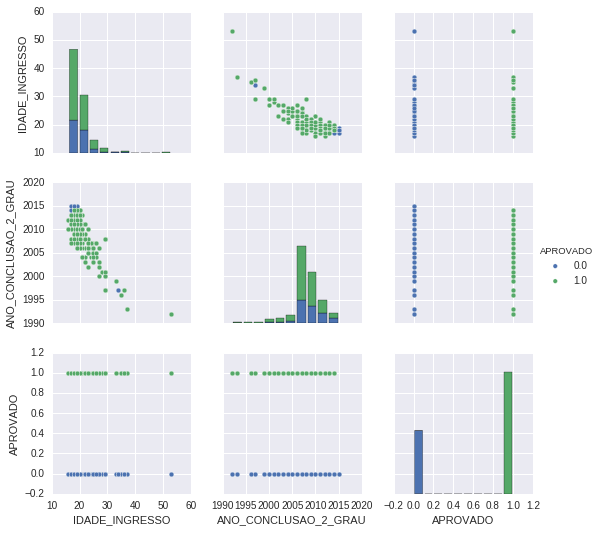

In [573]:
sb.pairplot(grau2.dropna(), hue='APROVADO')

#OBSERVAMOS QUE QUANTO MAIOR FOR A IDADE_INGRESSO, MENOR É O ANO_CONCLUSAO_2_GRAU

#AZUL = REPROVADO
#VERDE = APROVADO

#OBSERVAMOS UM "OUTLIER" COM IDADE DE SUPERIOR A 40 ANOS COM O ANO_CONCLUSAO_2_GRAU
#MUITO PRÓXIMO A SÉRIE HISTÓRICA.


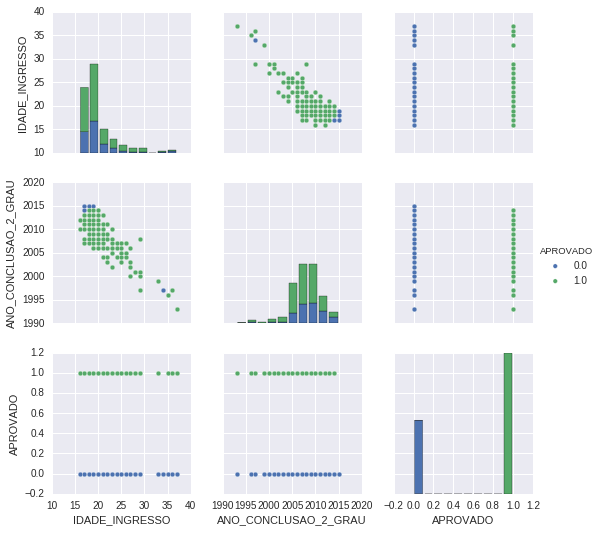

In [574]:
#EXCLUINDO OUTLIER DA SÉRIE HISTÓRICA E REGERANDO PLOT

grau2_clean = grau2.loc[eca['IDADE_INGRESSO']<40]
sb.pairplot(grau2_clean.dropna(), hue='APROVADO')

#OBSERVOU-SE QUE É POSSÍVEL APLICAR REGRESSÃO LINEAR PARA IMPUTAR O ANO_CONCLUSAO_2_GRAU
#AOS ALUNOS QUE NÃO INFORMARAM ESSE DADO

In [575]:

#Para realizar a Regressão Linear utilizou-se as bibliotecas SCIKIT-LEARN (Machine Learning)
#e NUMPY para manipulação de arrays e matrizes multidimensionais, possuindo uma 
#larga coleção de funções matemáticas para trabalhar com estas estruturas.)

#IMPORTANDO numpy
import numpy as np


#IMPORTANDO O MÓDULO linear_model DA BIBLIOTECA scikit-learn 
from sklearn import linear_model


#obs:É NECESSÁRIO CONVERSÃO DE PANDAS PARA NUMPY 
#PORQUE O SCIKIT-LEARN NÃO TRABALHA BEM COM O PANDAS


#CONVENÇÕES DAS VARIÁVEIS CRIADAS
#TERMINAÇÕES PD=PANDAS, NP=NUMPY



#CRANDO BASE DE TREINO SEM ANO_CONCLUSAO_2_GRAU NULOS 
#(UTILIZANDO O OPERADOR DE NEGAÇÃO ~)
#PANDAS pd
treino_pd = grau2.loc[~grau2['ANO_CONCLUSAO_2_GRAU'].isnull()] 


#CRANDO BASE DE REGRESSÃO COM ANO_CONCLUSAO_2_GRAU NULOS (PANDAS pd)
prdict_pd = grau2.loc[grau2['ANO_CONCLUSAO_2_GRAU'].isnull()]


#CRIANDO NUMPY-ARRAYS. O scikit-learn NÃO FUNCIONA BEM COM O PANDAS
treino_np = treino_pd.as_matrix(columns={'IDADE_INGRESSO','ANO_CONCLUSAO_2_GRAU'})
prdict_np = prdict_pd.as_matrix(columns={'IDADE_INGRESSO','ANO_CONCLUSAO_2_GRAU'})

In [576]:

#CRIANDO UM OBJETO DE REGRESSÃO LINEAR DO SCIKIT-LEARN
regr = linear_model.LinearRegression()

In [577]:

#SEPARANDO O X E O Y PARA A REGRESSÃO DO CONJUNTO DE TREINO
idade_ingresso_treino = treino_np[:, np.newaxis, 0]
ano_concussao_treino = treino_np[:, np.newaxis, 1]



#TREINANDO COM O CONJUNTO DE TREINO X E Y PARA REGRESSÃO
regr.fit(idade_ingresso_treino, ano_concussao_treino)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [578]:
#IDADES_INGRESSO QUE NÃO TEM ANO_CONCLUSAO_2_GRAU PARA A REGRESSAO
#SELECIONANDO A IDADE_INGRESSO DE TESTE PARA REALIZAR PREDIÇÃO DO ANO_CONCLUSAO_2_GRAU

idade_ingresso_predict = prdict_np[:, np.newaxis, 0]


In [579]:
#REALIZANDO A REGRESSÃO

ano_predict = regr.predict(idade_ingresso_predict)

ano_predict


array([[ 2009.46507492],
       [ 2009.46507492],
       [ 2009.46507492],
       [ 2009.46507492],
       [ 2009.46507492],
       [ 2009.46507492],
       [ 2009.46507492],
       [ 2009.46507492],
       [ 2009.46507492],
       [ 2009.46507492],
       [ 2009.46507492],
       [ 2009.46507492],
       [ 2009.46507492],
       [ 2009.46507492],
       [ 2009.46507492],
       [ 2009.46507492],
       [ 2009.46507492],
       [ 2009.46507492],
       [ 2009.46507492],
       [ 2009.46507492],
       [ 2009.46507492],
       [ 2009.46507492],
       [ 2009.46507492],
       [ 2009.46507492],
       [ 2009.46507492],
       [ 2009.46507492],
       [ 2009.46507492],
       [ 2009.46507492],
       [ 2009.46507492],
       [ 2009.46507492],
       [ 2009.46507492],
       [ 2009.46507492],
       [ 2009.46507492],
       [ 2009.46507492],
       [ 2009.46507492],
       [ 2009.46507492],
       [ 2009.46507492],
       [ 2009.46507492],
       [ 2009.46507492],
       [ 2009.46507492],


In [580]:
#JUNTANDO A REGRESSÃO DO ANO_CONCLUSAO_2_GRAU COM A IDADE_INGRESSO

prdict_np[:, np.newaxis, 1] = ano_predict

prdict_np

array([[   18.        ,  2009.46507492],
       [   18.        ,  2009.46507492],
       [   18.        ,  2009.46507492],
       ..., 
       [   20.        ,  2008.15516423],
       [   20.        ,  2008.15516423],
       [   20.        ,  2008.15516423]])

In [581]:
eca.loc[eca['ANO_CONCLUSAO_2_GRAU'].isnull()
        ,'ANO_CONCLUSAO_2_GRAU'] = prdict_np[:, np.newaxis, 1]

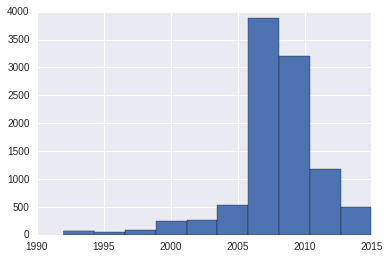

In [582]:
##SALVANDO NOVO CSV - PRÉVIA COM TÉCNICAS DE DATA PREPROCESSING

eca.to_csv('eca_clean.csv', index=False)
eca = pd.read_csv('eca_clean.csv', na_values=['NULL'])


#HISTOGRAMA DOS VALORES DO ANO_CONCLUSAO_2_GRAU
eca['ANO_CONCLUSAO_2_GRAU'].hist()